# Project Part 2: Data Exploration and Regression Fitting

* Student name: Daniel Büttner



## Further Data Exploration, Influences on House Prices, and Regression Fitting

- 1) Loading relevant modules and cleaned data set from file, adding columns
- 2) Normalize Data for Regression Analyis 
- 3) Compute Correlation Matrix and Visualize Heatmap for selected Variables (non-categorical)
- 4) Visualize Scatter Matrix for the most relevant (correlated) features to House Price
- 5) Fit a Multiple Linear Regression Model to the most relevant (non-categorical) Variables, and also include\_ categorical variable (especially Zipcode as a measure of neighborhood area)


## 1) Loading relevant modules and cleaned data set from file, adding columns:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fol
import statsmodels.api as sms
import statsmodels.formula.api as smf

file1 = '/Users/dbuettner/nf-ds/Project_Data_Analysis/House_Prices_Project/king_county_house_prices_dataset_cleaned.csv'
h_p = pd.read_csv(file1, skipinitialspace=True, parse_dates=['date'])

In [26]:
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 21 columns):
id               21419 non-null int64
date             21419 non-null datetime64[ns]
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null int64
view             21419 non-null int64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null int64
yr_built         21419 non-null int64
yr_renovated     740 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(14)
memory usage: 3.4 MB


In [27]:
# Add separate columns for year, month and day information

date_year = h_p.date.apply(lambda d: d.year)
date_year.name = 'date_year'
date_month = h_p.date.apply(lambda d: d.month)
date_month.name = 'date_month'
date_day = h_p.date.apply(lambda d: d.day)
date_day.name = 'date_day'
#h_p.date[:10].month
date_month.max()

h_p = pd.concat([h_p, date_year, date_month, date_day], axis=1)
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 24 columns):
id               21419 non-null int64
date             21419 non-null datetime64[ns]
price            21419 non-null float64
bedrooms         21419 non-null int64
bathrooms        21419 non-null float64
sqft_living      21419 non-null int64
sqft_lot         21419 non-null int64
floors           21419 non-null float64
waterfront       21419 non-null int64
view             21419 non-null int64
condition        21419 non-null int64
grade            21419 non-null int64
sqft_above       21419 non-null int64
sqft_basement    21419 non-null int64
yr_built         21419 non-null int64
yr_renovated     740 non-null float64
zipcode          21419 non-null int64
lat              21419 non-null float64
long             21419 non-null float64
sqft_living15    21419 non-null int64
sqft_lot15       21419 non-null int64
date_year        21419 non-null int64
date_month       21419 non-null int6

In [28]:
print('Start of the data set    : ' , h_p.date.sort_values().iloc[0])
print('End of the data set      : ' , h_p.date.sort_values().iloc[-1])

Start of the data set    :  2014-05-02 00:00:00
End of the data set      :  2015-05-27 00:00:00


In [29]:
# Add columns for average price per sqft (living, above, basement) and average sqft (living, above) per price (100000$):

h_p['p_p_sqft1'] = h_p.price / h_p.sqft_living                   # price per square feat (living)
h_p['p_p_sqft2'] = h_p.price / h_p.sqft_above                    # price per square feat (above)
#h_p['p_p_sqft3'] = h_p.price / h_p.sqft_basement                 # price per square feat (basement)
h_p['sqft_p_p1'] = (h_p.sqft_living / h_p.price) * 100000.       # square feat (living) per 100000$
h_p['sqft_p_p2'] = (h_p.sqft_above / h_p.price) * 100000.        # square feat (above) per 100000$
#h_p['sqft_p_p2'] = (h_p.sqft_basement / h_p.price) * 100000.     # square feat (basement) per 100000$

In [30]:
h_p.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,date_year,date_month,date_day,p_p_sqft1,p_p_sqft2,sqft_p_p1,sqft_p_p2
count,2.141900e+04,2.141900e+04,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.00000,...,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,4.581042e+09,5.417552e+05,3.372566,7.511742,2083.154256,1.512846e+04,1.496008,0.006816,0.233998,3.41071,...,-122.213778,1988.414819,12776.095196,2014.324572,6.566600,15.689061,264.634998,315.531132,440.790613,384.645015
std,2.876790e+09,3.675640e+05,0.903013,4.211743,918.824411,4.153172e+04,0.540083,0.082281,0.765453,0.64996,...,0.140792,685.538299,27346.204562,0.468226,3.117158,8.637595,109.842970,147.433899,172.217932,168.253892
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.00000,...,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000,87.588235,87.588235,125.000000,65.930599
25%,2.123375e+09,3.249250e+05,3.000000,4.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.00000,...,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000,182.880184,206.993823,313.805233,254.996160
50%,3.904921e+09,4.500000e+05,3.000000,7.000000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.00000,...,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000,245.161290,280.927835,407.894737,355.963303
75%,7.308900e+09,6.450000e+05,4.000000,10.000000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.00000,...,-122.125000,2370.000000,10086.500000,2015.000000,9.000000,23.000000,318.669002,392.162769,546.806107,483.106205
max,9.900000e+09,7.700000e+06,11.000000,67.500000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,...,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000,800.000000,1516.746411,1141.705843,1141.705843


## 2) Normalize non-categorical variables

In [31]:
# write normalizing function

def normalize(var):
    var_norm = (var - var.min()) / (var.max() - var.min())
    
    return var_norm


# Apply normalize function for selected columns and add new column to data frame:

cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',\
'sqft_basement', 'sqft_living15', 'sqft_lot15', 'p_p_sqft1', 'p_p_sqft2', 'sqft_p_p1', 'sqft_p_p2']
#cols = h_p.columns

for col in cols:
    #print(h_p[col][0])
    #print(col)
    h_p[col + '_norm'] = normalize(h_p[col])
    
    
h_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21419 entries, 0 to 21418
Data columns (total 44 columns):
id                    21419 non-null int64
date                  21419 non-null datetime64[ns]
price                 21419 non-null float64
bedrooms              21419 non-null int64
bathrooms             21419 non-null float64
sqft_living           21419 non-null int64
sqft_lot              21419 non-null int64
floors                21419 non-null float64
waterfront            21419 non-null int64
view                  21419 non-null int64
condition             21419 non-null int64
grade                 21419 non-null int64
sqft_above            21419 non-null int64
sqft_basement         21419 non-null int64
yr_built              21419 non-null int64
yr_renovated          740 non-null float64
zipcode               21419 non-null int64
lat                   21419 non-null float64
long                  21419 non-null float64
sqft_living15         21419 non-null int64
sqft_lot15  

In [34]:
h_p.describe().loc[:, 'price_norm':]

,price_norm,bedrooms_norm,bathrooms_norm,sqft_living_norm,sqft_lot_norm,floors_norm,condition_norm,grade_norm,sqft_above_norm,sqft_basement_norm,sqft_living15_norm,sqft_lot15_norm,p_p_sqft1_norm,p_p_sqft2_norm,sqft_p_p1_norm,sqft_p_p2_norm
count,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000
mean,0.060844,0.237257,0.104653,0.130080,0.008849,0.198403,0.602678,0.466282,0.157213,0.060570,0.273518,0.013928,0.248517,0.159495,0.310602,0.296265
std,0.048224,0.090301,0.062862,0.069766,0.025158,0.216033,0.162490,0.117199,0.091670,0.091884,0.117973,0.031413,0.154185,0.103161,0.169388,0.156402
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.032396,0.200000,0.059701,0.080486,0.002738,0.000000,0.500000,0.400000,0.091814,0.000000,0.187747,0.005111,0.133760,0.083550,0.185703,0.175748
50%,0.048806,0.200000,0.097015,0.117692,0.004297,0.200000,0.500000,0.400000,0.131637,0.000000,0.247978,0.008005,0.221183,0.135282,0.278246,0.269603
75%,0.074390,0.300000,0.141791,0.165528,0.006162,0.400000,0.750000,0.500000,0.204646,0.116183,0.339184,0.010839,0.324364,0.213115,0.414875,0.387791
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3) Compute Correlation Matrix and Visualize Heatmap for selected Variables

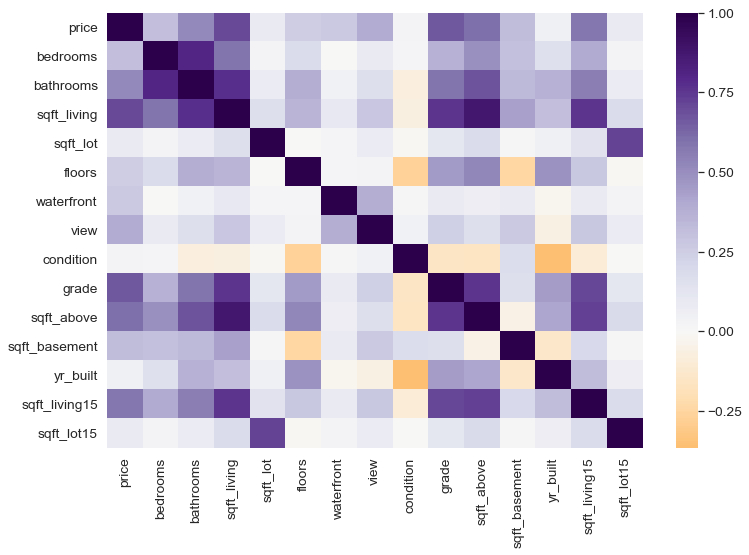

In [105]:
# Select (non-categorical) columns, compute correlation matrix and visualize heatmap:

cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',\
        'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']       #, 'p_p_sqft1', 'p_p_sqft2']


corr_mat1 = h_p[cols].corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat1, cmap='PuOr', center=0.0)

In [49]:
# Select normalized (non-categorical) columns, compute correlation matrix and visualize heatmap:

cols2 = ['price_norm', 'bedrooms_norm', 'bathrooms_norm', 'sqft_living_norm', 'sqft_lot_norm', 'floors_norm',\
         'condition_norm', 'grade_norm', 'sqft_above_norm','sqft_basement_norm', 'sqft_living15_norm',\
         'sqft_lot15_norm']       #, 'p_p_sqft1_norm', 'p_p_sqft2_norm']


corr_mat2 = h_p[cols2].corr()
#plt.subplots(figsize=(12,8))
#sns.heatmap(corr_mat2, cmap='PuOr', center=0.0)    # exactly the same values, independent of normalization!!!

In [53]:
# Show highest correlated Variables to House Price:
#corr_mat1.iloc[0, :].sort_values(ascending=False)

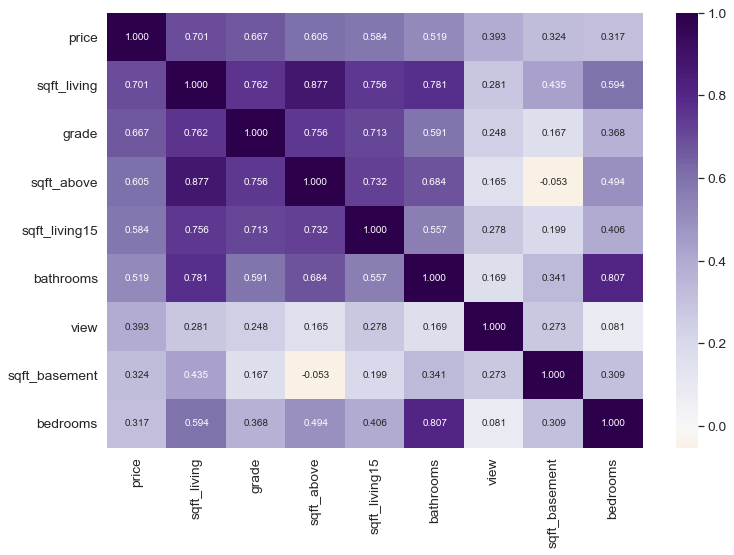

In [54]:
# Select highest correlated variables to House Price, compute correlation matrix and visualize annotated heatmap:

k = 9 #number of variables for heatmap
cols3 = corr_mat1.nlargest(k, 'price')['price'].index
cm = np.corrcoef(h_p[cols3].values.T)
sns.set(font_scale=1.25)
plt.subplots(figsize=(12,8))
hm = sns.heatmap(cm,annot=True, fmt='.3f', annot_kws={'size': 10}, yticklabels=cols3.values, xticklabels=cols3.values, cmap='PuOr', center=0.0)
plt.show()

## 4) Visualize Scatter Matrix for the most relevant (correlated) features to House Price

In [60]:
# Select most relevant Feature Variables based on Correlation and visualize the Scatter Matrix:

cols4 = ['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']
cols5 = ['price', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']

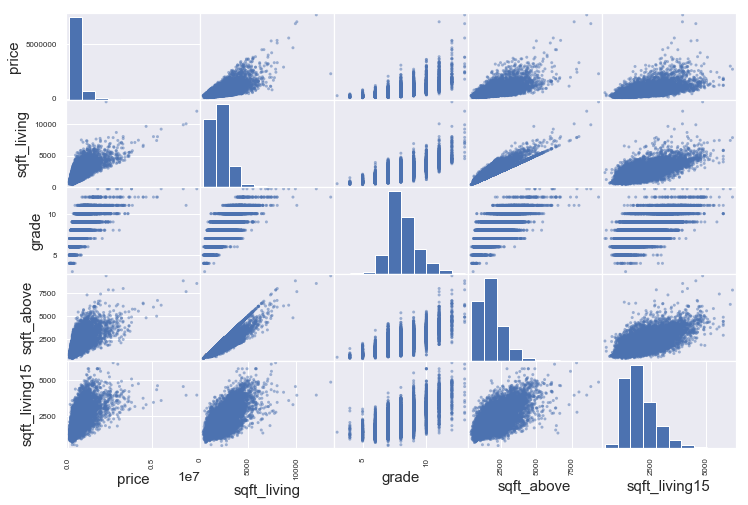

In [58]:
pd.plotting.scatter_matrix(h_p[cols4], figsize=(12, 8), edgecolor='none', alpha=0.5)
plt.show()

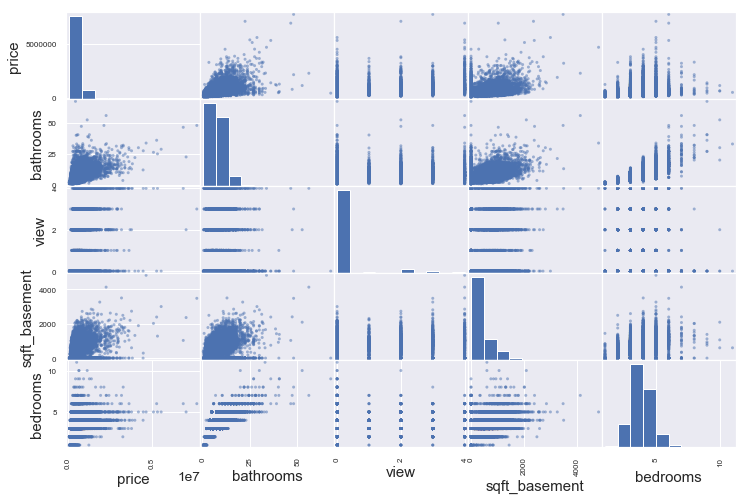

In [59]:
pd.plotting.scatter_matrix(h_p[cols5], figsize=(12, 8), edgecolor='none', alpha=0.5)
plt.show()

## 5) Multiple Linear Regression for House Price

### Fit a Multiple Linear Regression Model to the most relevant (non-categorical) Variables, and also include\_ categorical variable (especially Zipcode as a measure of neighborhood area)

In [189]:
# using the statsmodels.formula.api: formulate relation, build model, and fit to results

# first only include normalized, non-categorical variables (highest correlation)

#'price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15'
#cols5 = ['price', 'bathrooms', 'view', 'sqft_basement', 'bedrooms']


form1 = 'price_norm ~ sqft_living_norm + grade_norm + sqft_above_norm + sqft_living15_norm + bathrooms_norm\
        + view + sqft_basement_norm + bedrooms_norm'

#form1 = 'price ~ sqft_living + grade + sqft_above + sqft_living15 + bathrooms + view + sqft_basement + bedrooms'



model1 = smf.ols(data=h_p, formula=form1)
results1 = model1.fit()
results1.summary()

# all variables but sqft_living15_norm are statistically significant (P>|t| = 0.00), but the model output states
# that there is an indication for strong multicollinearity (not surprising by the heatmap and scatter matrix)

# actually using normalized or non-normalized variables doesn't make any difference on R2 and other values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_norm   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     4217.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:36:14   Log-Likelihood:                 43829.
No. Observations:               21419   AIC:                        -8.764e+04
Df Residuals:                   21411   BIC:                        -8.758e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.0278      0.001    -23.191      0.000      -0.030      -0.025
sqft_living_norm       0.1152      0.003     44.231      0.000       0.110       0.120
grade_norm             0.1210      0.003     38.688      0.000       0.115       0.127
sqft_above_norm        0.1177      0.003     35.013      0.000       0.111       0.124
sqft_living15_norm     0.0055      0.003      1.847      0.065      -0.000       0.011
bathrooms_norm         0.0523      0.008      6.913      0.000       0.037       0.067
view                   0.0115      0.000     38.177      0.000       0.011       0.012
sqft_basement_norm     0.0940      0.002     38.494      0.000       0.089       0.099
bedrooms_norm         -0.0702      0.004    -16.920      0.000      -0.078      -0.062
==============================================================================
Omnibus:                    16028.755   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           954733.621
Skew:                           3.054   Prob(JB):                         0.00
Kurtosis:                      35.132   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.18e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### All variables but sqft_living15_norm are statistically significant (P>|t| = 0.00), but the model output states that there is an indication for strong multicollinearity (not surprising by the heatmap and scatter matrix)

#### (actually using normalized or non-normalized variables doesn't make any difference on R2 and other values)

In [192]:
#form2 = 'price_norm ~ sqft_living_norm + grade_norm + bathrooms_norm + view + bedrooms_norm'
#form2 = 'price_norm ~ sqft_living_norm + grade_norm + sqft_above_norm + bathrooms_norm + view + bedrooms_norm'
form2 = 'price_norm ~ sqft_living_norm + grade_norm + view'


model2 = smf.ols(data=h_p, formula=form2)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_norm   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     9505.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:37:01   Log-Likelihood:                 43614.
No. Observations:               21419   AIC:                        -8.722e+04
Df Residuals:                   21415   BIC:                        -8.719e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0370      0.001    -38.110      0.000      -0.039      -0.035
sqft_living_norm     0.2878      0.005     59.541      0.000       0.278       0.297
grade_norm           0.1233      0.003     43.252      0.000       0.118       0.129
view                 0.0127      0.000     43.193      0.000       0.012       0.013
==============================================================================
Omnibus:                    16544.827   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1088672.318
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      37.343   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Subsequently and interatively removing certain variables to reduce complexity and the chance for multicollinearity lead to the following subset of feature variables:
- #### sqft_living_norm, grade_norm, sqft_above_norm, bathrooms_norm, view, bedrooms_norm

### The coefficient of determination almost stayed the same for even further reduction to the small set:
- #### sqft_living_norm, grade_norm, view

In [197]:
# Including categorical variables into the model (especially Zipcode):

#form3 = 'price_norm ~ sqft_living_norm + C(grade_norm) + C(zipcode) + C(view) + waterfront'
form3 = 'price_norm ~ sqft_living_norm + grade_norm + C(zipcode)'


model3 = smf.ols(data=h_p, formula=form3)
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_norm   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     875.3
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:45:23   Log-Likelihood:                 49155.
No. Observations:               21419   AIC:                        -9.817e+04
Df Residuals:                   21347   BIC:                        -9.759e+04
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0480      0.001    -32.131      0.000      -0.051      -0.045
C(zipcode)[T.98002]     0.0059      0.002      2.722      0.007       0.002       0.010
C(zipcode)[T.98003]    -0.0009      0.002     -0.458      0.647      -0.005       0.003
C(zipcode)[T.98004]     0.1036      0.002     54.488      0.000       0.100       0.107
C(zipcode)[T.98005]     0.0402      0.002     17.539      0.000       0.036       0.045
C(zipcode)[T.98006]     0.0381      0.002     22.201      0.000       0.035       0.041
C(zipcode)[T.98007]     0.0315      0.002     12.885      0.000       0.027       0.036
C(zipcode)[T.98008]     0.0389      0.002     20.032      0.000       0.035       0.043
C(zipcode)[T.98010]     0.0119      0.003      4.284      0.000       0.006       0.017
C(zipcode)[T.98011]     0.0145      0.002      6.669      0.000       0.010       0.019
C(zipcode)[T.98014]     0.0166      0.003      6.507      0.000       0.012       0.022
C(zipcode)[T.98019]     0.0101      0.002      4.626      0.000       0.006       0.014
C(zipcode)[T.98022]     0.0073      0.002      3.568      0.000       0.003       0.011
C(zipcode)[T.98023]    -0.0039      0.002     -2.297      0.022      -0.007      -0.001
C(zipcode)[T.98024]     0.0256      0.003      8.437      0.000       0.020       0.032
C(zipcode)[T.98027]     0.0209      0.002     11.820      0.000       0.017       0.024
C(zipcode)[T.98028]     0.0155      0.002      7.967      0.000       0.012       0.019
C(zipcode)[T.98029]     0.0247      0.002     13.073      0.000       0.021       0.028
C(zipcode)[T.98030]    -0.0006      0.002     -0.288      0.774      -0.005       0.003
C(zipcode)[T.98031]     0.0011      0.002      0.584      0.559      -0.003       0.005
C(zipcode)[T.98032]     0.0016      0.003      0.638      0.523      -0.003       0.007
C(zipcode)[T.98033]     0.0499      0.002     28.516      0.000       0.047       0.053
C(zipcode)[T.98034]     0.0279      0.002     16.776      0.000       0.025       0.031
C(zipcode)[T.98038]     0.0024      0.002      1.480      0.139      -0.001       0.006
C(zipcode)[T.98039]     0.1808      0.004     48.295      0.000       0.173       0.188
C(zipcode)[T.98040]     0.0752      0.002     38.262      0.000       0.071       0.079
C(zipcode)[T.98042]     0.0009      0.002      0.535      0.593      -0.002       0.004
C(zipcode)[T.98045]     0.0139      0.002      6.604      0.000       0.010       0.018
C(zipcode)[T.98052]     0.0286      0.002     17.280      0.000       0.025       0.032
C(zipcode)[T.98053]     0.0253      0.002     14.162      0.000       0.022       0.029
C(zipcode)[T.98055]     0.0077      0.002      3.844      0.000       0.004       0.012
C(zipcode)[T.98056]     0.0150      0.002      8.448      0.000       0.012       0.018
C(z

### Testing to include categorical variables showed that the Zipcode Area has a major Influence in Sales Price, or that certain areas are more expansive than others holding other factors constant. The highest explained variance (82,7%) was achieved using the following set of variables:
- #### sqft_living_norm, grade_norm (as categorical), view (as categorical), zipcode (as categorical) and waterfront

### Further reduction to a small subset showed no excessive decrease in the coefficient of determination (74,3%):
- #### sqft_living_norm, grade_norm, zipcode (as categorical)


### This corresponds to the intuition, that the size of the living area, the built quality, and the surrounding neighborhood most heavily influence the Sales Price of a House.

### The unexplained variance in the data set and other fitting methods/models should be further explored in the future.

## Discussion of the regression coefficients (not normalized) for feature variables:

- #### Living Area (sqft_living): 197,14, which means, that on average for every additional Square Foot of Living Area, an increase in House Price of 197,14 USD is expected, or in other words, the average Price per Square Foot reproduced by the model is 197,14 USD. This corresponds well to the calculated median Sales Price per Square Foot of Living Area, which is 245,16 USD.

- #### Grade (built quality of the house and interior): 62080, which means, that on average for every increase in Grade (in steps of 1), an increase in House Price of 62080 USD is expected.

- #### the above values can vary for different Zipcode Areas or Neighborhoods. The Zipcode Area as Catergorical Feature has a big influence on the expected House Price (of similar magnitude than sqft_living)

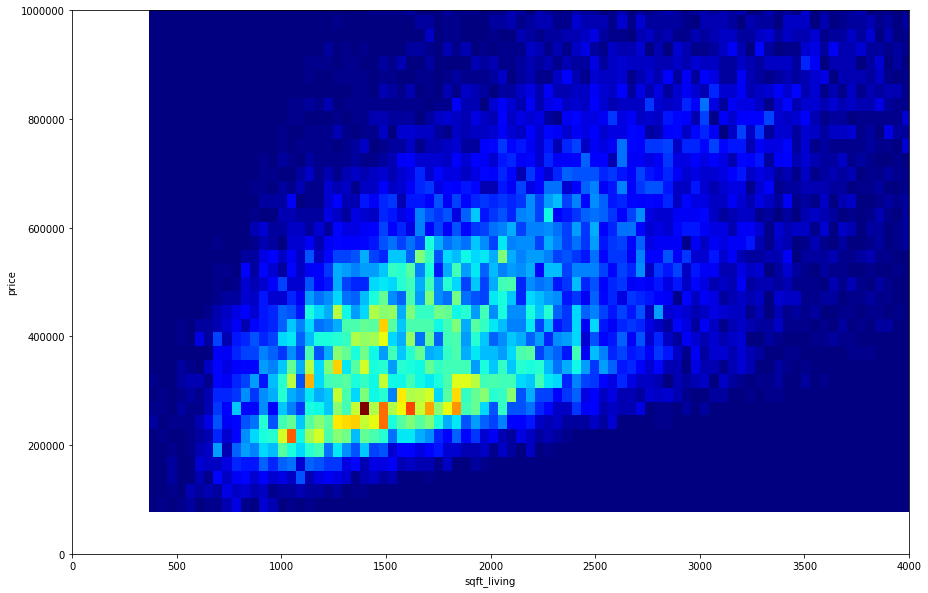

In [19]:
plt.subplots(figsize=(15,10))
plt.hist2d(h_p['sqft_living'], h_p['price'], bins=300, cmap=plt.cm.jet)
plt.xlim(0, 4000)
plt.ylim(0, 1000000)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()